In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import QUANTAXIS as qtx

In [2]:
%matplotlib inline

In [3]:
codelist=qtx.QA_fetch_stock_block_adv().get_block('云计算').code

In [4]:
codelist

['000021',
 '000034',
 '000066',
 '000070',
 '000555',
 '000662',
 '000676',
 '000815',
 '000836',
 '000851',
 '000938',
 '000948',
 '000971',
 '000977',
 '002063',
 '002065',
 '002075',
 '002093',
 '002095',
 '002122',
 '002123',
 '002137',
 '002152',
 '002153',
 '002174',
 '002195',
 '002197',
 '002212',
 '002230',
 '002232',
 '002238',
 '002261',
 '002268',
 '002279',
 '002301',
 '002315',
 '002316',
 '002335',
 '002362',
 '002368',
 '002396',
 '002417',
 '002421',
 '002439',
 '002453',
 '002467',
 '002530',
 '002544',
 '002642',
 '002649',
 '002657',
 '002757',
 '002837',
 '002912',
 '300002',
 '300017',
 '300020',
 '300025',
 '300036',
 '300044',
 '300047',
 '300051',
 '300052',
 '300131',
 '300157',
 '300166',
 '300168',
 '300170',
 '300175',
 '300188',
 '300202',
 '300211',
 '300212',
 '300229',
 '300235',
 '300245',
 '300249',
 '300271',
 '300287',
 '300290',
 '300297',
 '300302',
 '300310',
 '300311',
 '300312',
 '300339',
 '300344',
 '300366',
 '300369',
 '300376',
 '300378',

In [6]:
data=qtx.QA_fetch_stock_day_adv(codelist,'2017-09-01','2018-05-20')
data=data.to_qfq()

In [8]:
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =qtx.EMA(CLOSE,SHORT) - qtx.EMA(CLOSE,LONG)
    DEA = qtx.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=qtx.CROSS(DIFF,DEA)
    CROSS_SC=qtx.CROSS(DEA,DIFF)
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC})

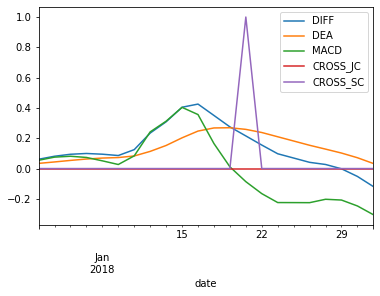

In [9]:
ind=data.add_func(MACD_JCSC)
ind.xs(codelist[0],level=1)['2018-01'].plot()

In [11]:
ind.xs(codelist[0],level=1)

,DIFF,DEA,MACD,CROSS_JC,CROSS_SC
date,,,,,
2017-09-01,NaN,NaN,NaN,0,0
2017-09-04,NaN,NaN,NaN,0,0
2017-09-05,NaN,NaN,NaN,0,0
2017-09-06,NaN,NaN,NaN,0,0
2017-09-07,NaN,NaN,NaN,0,0
2017-09-08,NaN,NaN,NaN,0,0
2017-09-11,NaN,NaN,NaN,0,0
2017-09-12,NaN,NaN,NaN,0,0
2017-09-13,NaN,NaN,NaN,0,0


In [18]:
ind.loc['2018-01',slice(None)]

DIFF       DEA      MACD  CROSS_JC  CROSS_SC
date       code                                                    
2018-01-02 000021  0.061446  0.034138  0.054616         0         0
           000063  0.348687  0.536637 -0.375899         0         0
           000066 -0.101706 -0.161507  0.119602         0         0
           000070 -0.245032 -0.244742 -0.000580         0         0
           000100 -0.102588 -0.101068 -0.003038         0         0
           000555       NaN       NaN       NaN         0         0
           000662 -0.123448 -0.100317 -0.046262         0         0
           000665 -0.089952 -0.125775  0.071646         0         0
           000676 -0.260959 -0.302391  0.082864         0         0
           000815 -0.537121 -0.431097 -0.212048         0         0
           000836 -0.093526       NaN       NaN         0         0
           000851 -0.201339 -0.204301  0.005924         1         0
           000938  0.451220  0.149635  0.603169         0         0
           000948 -0.105885 -0.124833  0.037895         0         0
           000977  0.135376  0.082110  0.106532         0         0
           002063 -0.000388 -0.022465  0.044153         0         0
           002065 -0.321172 -0.302609 -0.037127         0         0
           002093  0.071286  0.040158  0.062256         0         0
           002095 -0.140981 -0.244639  0.207315         0         0
           002123 -0.195490 -0.190955 -0.009070         0         0
           002137 -0.104947 -0.132653  0.055411         0         0
           002152  0.128236  0.096633  0.063208         0         0
           002153 -0.027317  0.289335 -0.633304         0         0
           002174  0.035690  0.011819  0.047742         1         0
           002195 -0.087793 -0.092394  0.009203         1         0
           002197 -0.039670 -0.026235 -0.026870         0         0
           002212 -0.195556 -0.128267 -0.134578         0         0
           002230 -0.437451 -0.257582 -0.359739         0         0
           002232 -0.084873 -0.094514  0.019282         0         0
           002238 -0.124895 -0.153154  0.056518         0         0
...                     ...       ...       ...       ...       ...
2018-01-31 600410 -0.087796 -0.075092 -0.025407         0         1
           600510  0.024764  0.040566 -0.031606         0         0
           600522 -0.540854 -0.454804 -0.172101         0         0
           600536 -0.646211 -0.407190 -0.478042         0         0
           600588  0.190862  0.116365  0.148995         0         0
           600589  0.003947  0.017839 -0.027784         0         1
           600590 -0.144366 -0.146510  0.004289         0         0
           600601 -0.071292 -0.047403 -0.047779         0         0
           600602 -0.020108  0.022238 -0.084693         0         0
           600633  0.132640  0.137369 -0.009457         0         1
           600718 -0.370255 -0.324710 -0.091089         0         0
           600728 -0.226826 -0.183891 -0.085870         0         0
           600756 -0.266149 -0.188982 -0.154334         0         0
           600767 -0.135812 -0.156087  0.040549         0         0
           600770 -0.135974 -0.112889 -0.046169         0         0
           600797 -0.133432 -0.070133 -0.126599         0         0
           600804 -0.348421 -0.366275  0.035708         0         0
           600845  0.221303  0.276435 -0.110264         0         0
           600850 -0.727808 -0.633547 -0.188521         0         0
           600996  0.035243  0.031312  0.007861         0         0
           601360  0.734666  0.822011 -0.174689         0         0
           601789 -0.039195 -0.021892 -0.034605         0         0
           601928  0.004189 -0.006481  0.021341         0         0
           603003 -0.097148 -0.065635 -0.063026         0         0
           603019 -0.296879 -0.436679  0.279600         0         0
           603138 -0.491387 -0.106564 -0.769646         0         0
           

In [23]:
Account=qtx.QA_Account('user_test', 'portfolio_test')
Broker=qtx.QA_BacktestBroker()

In [25]:
data_forbacktest=data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.date[0], 
                amount=1000, 
                towards=qtx.ORDER_DIRECTION.BUY, 
                price=0, 
                order_model=qtx.ORDER_MODEL.CLOSE, 
                amount_model=qtx.AMOUNT_MODEL.BY_AMOUNT
                )
            #print(item.to_json()[0])
            Broker.receive_order(qtx.QA_Event(order=order,market_data=item))
            
            
            trade_mes=Broker.query_orders(Account.account_cookie,'filled')
            res=trade_mes.loc[order.account_cookie,order.realorder_id]
            order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=qtx.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=qtx.ORDER_MODEL.MARKET, 
                    amount_model=qtx.AMOUNT_MODEL.BY_AMOUNT
                    )
                Broker.receive_order(qtx.QA_Event(order=order,market_data=item))


                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order.account_cookie,order.realorder_id]
                order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()

QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000851/ Price:6.18/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:002174/ Price:23.25/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:002195/ Price:3.44/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:002456/ Price:20.7/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:002544/ Price:15.65/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300290/ Price:5.77/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300367/ Price:10.91/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:600105/ Price:4.76/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:600355/ Price:8.62/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:600797/ Pri

QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:002396/ Price:21.12/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:002456/ Price:19.76/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:300025/ Price:6.13/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:300052/ Price:15.76/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:300113/ Price:18.54/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:300128/ Price:8.1/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:300367/ Price:10.52/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:600850/ Price:18.63/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-15 00:00:00/ Code:002095/ Price:33.57/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-15 00:00:00/ Code:00

QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002137/ Price:7.01/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002153/ Price:27.08/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002261/ Price:7.68/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002268/ Price:23.51/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002362/ Price:25.12/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300036/ Price:15.35/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300052/ Price:15.12/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300128/ Price:7.81/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300168/ Price:13.95/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300170/ 

QAACCOUNT ==> receive deal  Time 2018-01-31 00:00:00/ Code:300211/ Price:6.52/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-31 00:00:00/ Code:300419/ Price:9.05/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-31 00:00:00/ Code:300520/ Price:21.43/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-31 00:00:00/ Code:300560/ Price:16.23/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-31 00:00:00/ Code:300678/ Price:29.67/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-31 00:00:00/ Code:600410/ Price:9.64/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-01 00:00:00/ Code:000066/ Price:6.77/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-01 00:00:00/ Code:000851/ Price:5.75/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-01 00:00:00/ Code:002123/ Price:9.91/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-01 00:00:00/ Code:00

QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002137/ Price:5.91/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002268/ Price:23.34/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002281/ Price:23.42/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002415/ Price:38.02/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002421/ Price:5.03/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002642/ Price:10.67/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:300036/ Price:13.65/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:300078/ Price:8.26/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:300229/ Price:8.15/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:300311/ P

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300379/ Price:11.08/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1447.8349999999682
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300419/ Price:7.29/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1447.8349999999682
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300465/ Price:8.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1447.8349999999682
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300541/ Price:11.01/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1447.8349999999682
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300608/ Price:14.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1447.8349999999682
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300678/ Price:26.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1447.8349999999682
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300687/ Price:15.79/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:002279/ Price:12.38/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:002415/ Price:39.76/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:002456/ Price:21.23/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:300044/ Price:9.62/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:300047/ Price:8.61/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:300166/ Price:16.93/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:300170/ Price:15.47/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:300202/ Price:20.44/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Code:300271/ Price:18.46/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-16 00:00:00/ Cod

QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300274/ Price:18.13/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300339/ Price:11.35/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300367/ Price:12.93/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300419/ Price:8.04/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300687/ Price:22.55/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:603019/ Price:27.32/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:603138/ Price:17.81/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:000815/ Price:12.18/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002368/ Price:18.34/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002439

QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300603/ Price:14.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
158.7575000003544
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:600100/ Price:10.91/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
158.7575000003544
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:600126/ Price:5.05/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
158.7575000003544
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:600225/ Price:4.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
158.7575000003544
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:600410/ Price:12.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
158.7575000003544
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:600601/ Price:3.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
158.7575000003544
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:002195/ Price:3.4/ TOWARDS:1/ Amounts:1000
ALERT MONEY N

QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:603003/ Price:11.93/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:002642/ Price:14.01/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300020/ Price:11.76/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300052/ Price:14.7/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300085/ Price:16.32/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300287/ Price:9.71/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300339/ Price:11.73/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300383/ Price:17.72/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:300465/ Price:10.91/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:3005

QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:300525/ Price:14.62/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:600410/ Price:12.46/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:600797/ Price:12.42/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:603003/ Price:11.11/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:603138/ Price:18.72/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-20 00:00:00/ Code:000662/ Price:9.66/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-20 00:00:00/ Code:000948/ Price:8.71/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-20 00:00:00/ Code:002063/ Price:6.24/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-20 00:00:00/ Code:002281/ Price:26.67/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-20 00:00:00/ Code:00

QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:002368/ Price:22.2/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:002530/ Price:12.93/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:002649/ Price:11.75/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:002912/ Price:49.53/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300052/ Price:14.26/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300376/ Price:6.89/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300561/ Price:14.0/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:601360/ Price:37.59/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:603322/ Price:21.47/ TOWARDS:1/ Amounts:1000


In [27]:
Account.init_assets

{'cash': 1000000, 'hold': {}}

In [28]:
Account.history

[['2018-01-02 00:00:00',
  '000851',
  6.18,
  1000.0,
  993815.0,
  'Order_r5PBvgJF',
  'Order_r5PBvgJF',
  'Trade_WjR0Z7og',
  'Acc_ewTDFt4q',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '002174',
  23.25,
  1000.0,
  970559.1875,
  'Order_s9KZbg4C',
  'Order_s9KZbg4C',
  'Trade_5iBpH6ur',
  'Acc_ewTDFt4q',
  5.8125,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '002195',
  3.44,
  1000.0,
  967114.1875,
  'Order_BPGXhbA1',
  'Order_BPGXhbA1',
  'Trade_QdEiXeTJ',
  'Acc_ewTDFt4q',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '002456',
  20.7,
  1000.0,
  946409.0125,
  'Order_4mzxNZHT',
  'Order_4mzxNZHT',
  'Trade_nZrf9Y03',
  'Acc_ewTDFt4q',
  5.175,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '002544',
  15.65,
  1000.0,
  930754.0125,
  'Order_N7hDUCEz',
  'Order_N7hDUCEz',
  'Trade_qoPQZ5jE',
  'Acc_ewTDFt4q',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '300290',
  5.77,
  1000.0,
  924979.0125,
  'Order_oAy

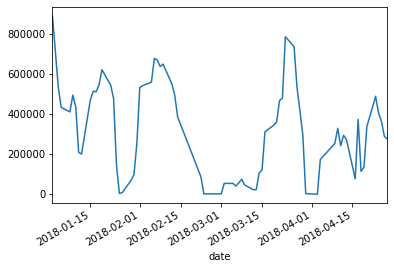

In [29]:
Account.daily_cash.cash.plot()

In [30]:
risk = qtx.QA_Risk(Account)

In [32]:
risk.message

{'account_cookie': 'Acc_ewTDFt4q',
 'portfolio_cookie': 'portfolio_test',
 'user_cookie': 'user_test',
 'annualize_return': -0.08,
 'profit': -0.02,
 'max_dropback': 0.1,
 'time_gap': 77,
 'volatility': 1.82,
 'benchmark_code': '000300',
 'bm_annualizereturn': -0.26,
 'bm_profit': -0.08,
 'beta': 0.48,
 'alpha': 0.04,
 'sharpe': -0.07,
 'sortino': -5.17,
 'init_cash': '999946.92',
 'last_assets': '975779.12',
 'total_tax': -4654.23,
 'total_commission': -3702.21,
 'profit_money': -24167.8,
 'assets': [999946.921509984,
  1001617.34566688,
  999906.351868724,
  991488.82872942,
  986554.5611327699,
  984182.729917917,
  986094.951687348,
  1004182.84935908,
  987779.9159552549,
  965297.595004689,
  969264.161712301,
  963110.802411767,
  957037.4414309061,
  957357.8655580438,
  959682.3815368118,
  958076.9037684189,
  971908.3470365768,
  963817.1649580539,
  966358.0828347118,
  950903.5653985548,
  949778.8800066028,
  925425.4648978459,
  911184.0810563819,
  913304.7206989378,
  

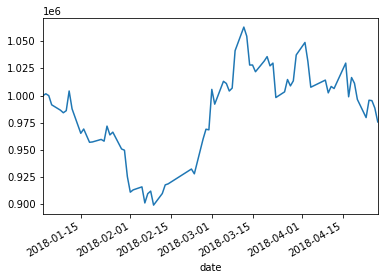

In [33]:
risk.assets.plot()

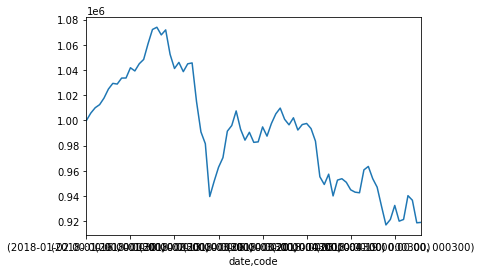

In [34]:
risk.benchmark_assets.plot()

C:\MyProgram\anaconda\envs\quant\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\MyProgram\anaconda\envs\quant\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\MyProgram\anaconda\envs\quant\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\MyProgram\anaconda\envs\quant\lib\site-packages\pandas\plotting\

<module 'matplotlib.pyplot' from 'C:\\MyProgram\\anaconda\\envs\\quant\\lib\\site-packages\\matplotlib\\pyplot.py'>

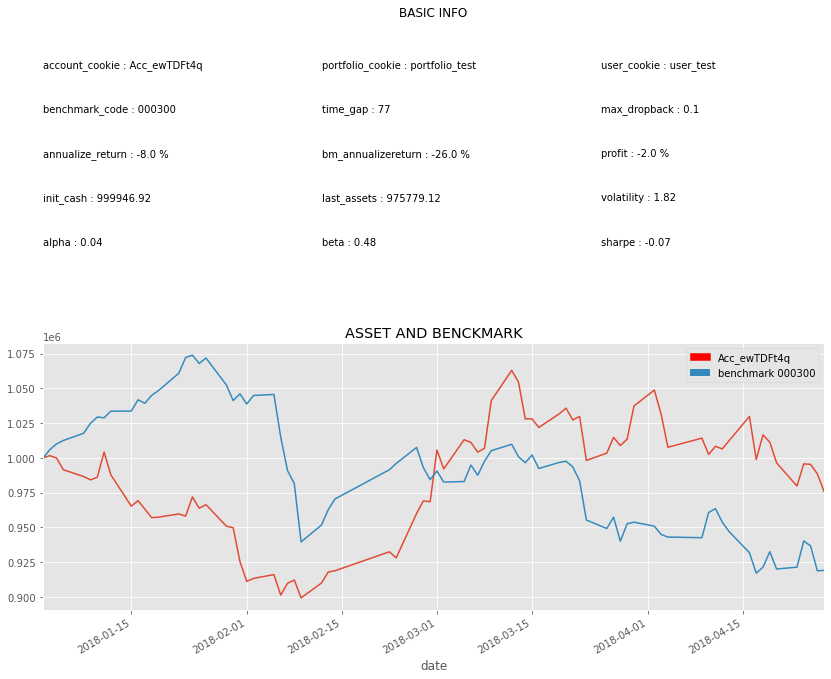

In [35]:
risk.plot_assets_curve()

In [36]:
risk.profit_construct

{'total_buyandsell': -15811.36,
 'total_tax': -4654.23,
 'total_commission': -3702.21,
 'total_profit': -24167.8}

In [37]:
performance = qtx.QA_Performance(Account)

In [38]:
performance.pnl_fifo

,sell_date,buy_date,amount,sell_price,buy_price,rawdirection,unit,pnl_ratio,pnl_money,hold_gap,if_buyopen,openprice,opendate,closeprice,closedate
code,,,,,,,,,,,,,,,
002174,2018-01-09,2018-01-02,1000.0,22.89,23.25,buy,1.0,-0.015484,-360.0,7 days,True,23.25,2018-01-02 00:00:00,22.89,2018-01-09 00:00:00
002421,2018-01-09,2018-01-03,1000.0,5.93,6.17,buy,1.0,-0.038898,-240.0,6 days,True,6.17,2018-01-03 00:00:00,5.93,2018-01-09 00:00:00
300271,2018-01-09,2018-01-04,1000.0,15.19,15.58,buy,1.0,-0.025032,-390.0,5 days,True,15.58,2018-01-04 00:00:00,15.19,2018-01-09 00:00:00
300367,2018-01-09,2018-01-02,1000.0,10.57,10.91,buy,1.0,-0.031164,-340.0,7 days,True,10.91,2018-01-02 00:00:00,10.57,2018-01-09 00:00:00
300520,2018-01-09,2018-01-05,1000.0,25.37,27.04,buy,1.0,-0.061760,-1670.0,4 days,True,27.04,2018-01-05 00:00:00,25.37,2018-01-09 00:00:00
601360,2018-01-09,2018-01-04,1000.0,51.92,60.84,buy,1.0,-0.146614,-8920.0,5 days,True,60.84,2018-01-04 00:00:00,51.92,2018-01-09 00:00:00
300310,2018-01-10,2018-01-04,1000.0,11.48,11.86,buy,1.0,-0.032040,-380.0,6 days,True,11.86,2018-01-04 00:00:00,11.48,2018-01-10 00:00:00
600131,2018-01-10,2018-01-08,1000.0,6.84,6.96,buy,1.0,-0.017241,-120.0,2 days,True,6.96,2018-01-08 00:00:00,6.84,2018-01-10 00:00:00
600601,2018-01-10,2018-01-08,1000.0,3.63,3.67,buy,1.0,-0.010899,-40.0,2 days,True,3.67,2018-01-08 00:00:00,3.63,2018-01-10 00:00:00


<generator object _quotation_base.panel_gen at 0x000001E22EB88248>